# Summative assessment

This is your summative assignment for the Machine Learning introduction course. You should solve it on your own, this is an individual assessment, not a group assessment!


In this assessment we will look at a practical, real world example of using Machine Learning to model data. 

### Context 

Every year the Office for Students organises a survey of students to collect views on how the Higher Education sector is performing. This survey is useful for institutions to monitor student satisfaction. It has a range of around 30 questions addressing different aspect of the students' experience. 

This year they have announced that they will stop asking the question

"Overall, I am satisfied with the quality of the course"

https://www.timeshighereducation.com/news/ofs-national-student-survey-will-drop-satisfaction-question

The question we try to address in this assessment is whether one could give a good estimate of what the answer to this question is, given the answer to the other questions.

### Guidance

- All plots you produce in this notebook need to have proper labels and legends where appropriate. 
- You are welcome to use `scikit-learn` and `pandas` functions, the ones imported in the solution cells are only suggestions of functionalisty that might be useful, you do not have to use them. 
- You can create new cells if it helps you structure your answer.
- The notebook will be evaluated from top to bottom, make sure all plots are generated correctly when the notebook is executed in this way.


First we import the data for the 2021-2022 survey:

In [1]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pandas.read_csv('/data/questions.csv')
df

,Provider,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,26
0,Nottingham Trent University,0.9008,0.8512,0.9008,0.7603,0.8595,0.8347,0.8347,0.7355,0.8017,...,0.8992,0.8512,0.8347,0.7355,0.9174,0.8099,0.7851,0.7479,0.5043,0.8843
1,The University of Leeds,0.8244,0.6683,0.8927,0.7512,0.7268,0.7463,0.7015,0.4927,0.6000,...,0.6552,0.8209,0.7951,0.5366,0.6927,0.7854,0.4976,0.3220,0.5181,0.7171
2,University of Keele,0.9019,0.7757,0.9579,0.8458,0.8598,0.7710,0.8458,0.6916,0.7897,...,0.9019,0.8038,0.9299,0.8038,0.8879,0.9299,0.6636,0.5829,0.5166,0.9289
3,The University of Warwick,0.8778,0.7862,0.9084,0.7637,0.8330,0.7841,0.6556,0.7026,0.7897,...,0.8123,0.8319,0.9051,0.5959,0.7690,0.8516,0.6763,0.4351,0.3969,0.8577
4,University of Sussex,0.8000,0.7000,0.9000,0.6333,0.7667,0.7333,0.6000,0.5667,0.8000,...,0.8966,0.9259,0.9000,0.4828,0.6333,0.8333,0.7000,0.4667,0.3571,0.7333
5,University of Dundee,0.7949,0.5641,0.8718,0.7179,0.7692,0.6923,0.6667,0.3846,0.5897,...,0.6410,0.8919,0.9231,0.5897,0.8718,0.8718,0.7838,0.4103,0.5405,0.6667
6,The University of Hull,0.9524,0.9762,0.9048,0.9048,0.8333,0.8571,0.7857,0.7143,0.6905,...,0.8293,0.8049,0.8571,0.6905,0.8571,0.9524,0.8571,0.6905,0.4390,0.9512
7,University College London,0.7931,0.7189,0.8486,0.7658,0.7786,0.7730,0.6576,0.6000,0.6865,...,0.8110,0.8879,0.9024,0.6360,0.8269,0.7931,0.6407,0.4846,0.5362,0.7713
8,University of Exeter,0.8395,0.8333,0.9506,0.8086,0.8889,0.8025,0.7654,0.5432,0.6813,...,0.8519,0.6842,0.9367,0.7840,0.8827,0.9259,0.6975,0.5188,0.3077,0.8580
9,The University of Manchester,0.8250,0.6847,0.8987,0.7741,0.7897,0.7641,0.6984,0.6159,0.7270,...,0.6916,0.8027,0.8438,0.5305,0.6817,0.8161,0.5516,0.4020,0.2340,0.8050


The data we are interested in are the answer to the 26 first questions which we can extract for the dataframe:

In [3]:
allbutlast = df.drop(['Provider','26'], axis=1)

The last question is the one we want to make predictions for based on the 26 first.

In [4]:
last = df['26']

## Task 1

Standardise the data. There is no need to set aside a test set as we will use data from the 20-21 survey as test set. [2 marks]


In [5]:
data = np.array(allbutlast)
targets = np.array(last)
# YOUR CODE HERE
av = np.average(data,axis=0)
sc = np.std(data,axis=0)
data_std = (data-av)/sc

print(f"The mean of the original data is: {np.round(data.mean(),3)}\
 while the mean of the Standardised data is: {np.round(data_std.mean(),3)} ")
print(f"The std of the original data is: {np.round(data.std(),3)}\
 while the std of the Standardised data is: {np.round(data_std.std(),3)} ")

The mean of the original data is: 0.727 while the mean of the Standardised data is: 0.0 
The std of the original data is: 0.16 while the std of the Standardised data is: 1.0 


## Task 2

To investigate how much information is contained in the data, use PCA to make a plot of the explained variance as a function of the number of dimensions retained. How many components can be dropped while maintaining 90% of the variance? [7 marks]


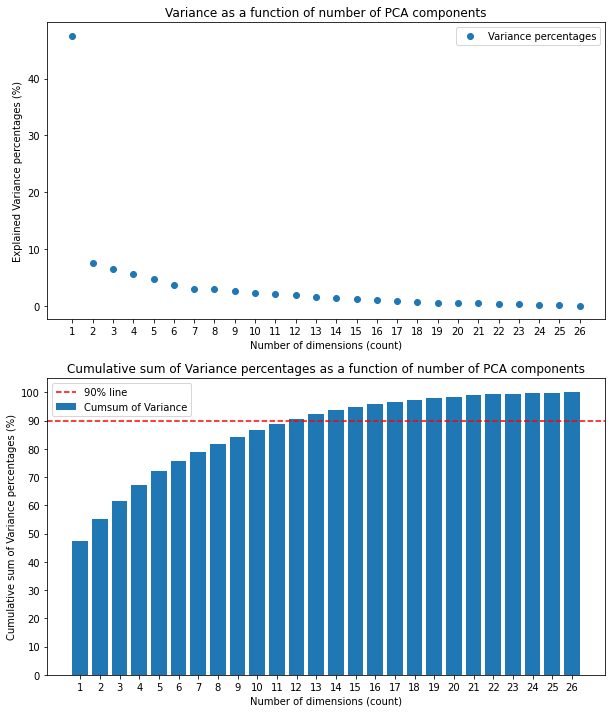

As illustrated in the above the figure we can drop 14 components while maintain 90% of the variance


In [12]:
from sklearn.decomposition import PCA
# YOUR CODE HERE

#Fitting the model 
pca = PCA()
pca.fit(data_std)
#Calculating the cumulative sum of variance 
fractions = np.cumsum(pca.explained_variance_ratio_)

#Preparing for plot
numberDim = [i for i in range(1,27)]

#Plot the figure of variance ration
fig, (ax0, ax1) = plt.subplots(nrows=2,  figsize=(10, 12))
ax0.plot(np.arange(1, pca.n_components_ + 1), 100*pca.explained_variance_ratio_, "o", linewidth=3)
ax0.set_ylabel("Explained Variance percentages (%)")
ax0.set_xlabel("Number of dimensions (count)")
ax0.set_xticks(numberDim)
ax0.legend(["Variance percentages"],loc=1)
ax0.title.set_text('Variance as a function of number of PCA components')

#Plot the figure of cumilative sum of variance ration
ax1.bar(numberDim,fractions*100,label= "line")
ax1.set_xticks(numberDim)
ax1.set_yticks(np.arange(0,105,10))
ax1.set_xlabel("Number of dimensions (count)")
ax1.set_ylabel("Cumulative sum of Variance percentages (%)")
ax1.axhline(y = 90, color = 'r', linestyle = '--')
ax1.legend(["90% line", "Cumsum of Variance"],loc=2)
ax1.title.set_text('Cumulative sum of Variance percentages as a function of number of PCA components')
plt.show()

#Print How many components we can drop.
print("As illustrated in the above the figure we can drop 14 components while maintain 90% of the variance")


## Task 3

Using the mean squared error as the target metric, make a plot of the performance of a linear regression model as a function of the number of PCA components kept. Use 5-fold cross validation to provide an estimate of the expected performance and uncertainty for the last question score. [8 marks]


The best result of mean squared error is: 0.0026810060917708996 
The best parameter is: 2
-------------------------------------------------------------------


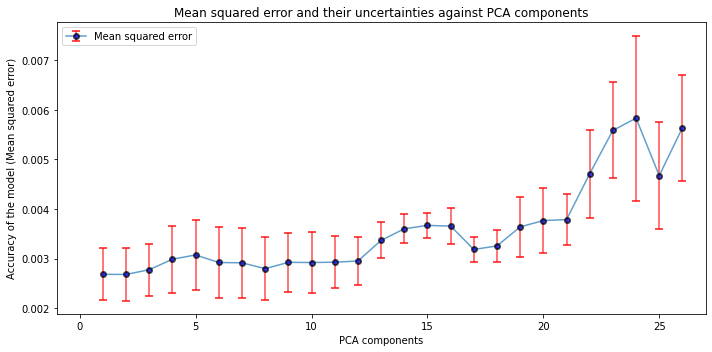

-------------------------------------------------------------------
The exprected performance (mean squared error) for different components of PCA is:
   PCA components  Expected value  Uncertainty
              1        0.002684     0.000527
              2        0.002681     0.000526
              3        0.002777     0.000526
              4        0.002989     0.000671
              5        0.003074     0.000698
              6        0.002922     0.000716
              7        0.002915     0.000701
              8        0.002798     0.000631
              9        0.002925     0.000597
             10        0.002921     0.000613
             11        0.002928     0.000519
             12        0.002951     0.000487
             13        0.003367     0.000362
             14        0.003601     0.000288
             15        0.003669     0.000258
             16        0.003656     0.000367
             17        0.003184     0.000254
             18        0.003257     0

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
# YOUR CODE HERE

#initialize different models
pca = PCA()
lr = LinearRegression()

pipe = Pipeline(steps=[("pca", pca), ("lr", lr)])
components = [i for i in range (1,27)]
param = {"pca__n_components": components}

#Fit the data and print the best results
search = GridSearchCV(pipe, param, n_jobs=1, cv = 5,scoring= 'neg_mean_squared_error')
search.fit(data_std, targets)
print(f"The best result of mean squared error is: {-1*search.best_score_} ")
print(f"The best parameter is: {search.best_params_['pca__n_components']}")
print("-------------------------------------------------------------------")
#Extract and prepare most important results
#I depend here on the standard error rule(std(N-1)/sqrt(N)) to represent the uncertaninty of the values of the mean 
#The built-in method in Grid Search is negative mean squared error for convergence purpose,
#So I multiplied with -1
results = pandas.DataFrame(search.cv_results_)
array = np.empty((26,5))
array[:,0] = results['split0_test_score']
array[:,1] = results['split1_test_score']
array[:,2] = results['split2_test_score']
array[:,3] = results['split3_test_score']
array[:,4] = results['split4_test_score']

y = np.mean(-1*array,axis = 1)
yerr = np.std(-1*array,axis = 1, ddof = 1)/np.sqrt(5)

#Ploting the expected performance with the corresponding uncertaininty in each value.
fig = plt.subplots( figsize=(10, 5))
plt.errorbar(components,y,yerr, capsize=4,ecolor = "red",  alpha = .7,marker='o', mfc='b',
         mec='black', ms=5, mew=2, label = "Mean squared error")
plt.ylabel("Accuracy of the model (Mean squared error)")
plt.xlabel("PCA components")
plt.xlim(-1, 27)
plt.legend(["Mean squared error"],loc=2)
plt.title("Mean squared error and their uncertainties against PCA components")
plt.tight_layout()
plt.show()

#Printing the value of the expected performance and corresponding uncertainty
ep = pandas.DataFrame(list(zip(components,y, yerr)), columns =["PCA components",'Expected value', 'Uncertainty']) 
print("-------------------------------------------------------------------")
print ("The exprected performance (mean squared error) for different components of PCA is:\n ",ep.to_string(index=False))

## Task 4

Give the score of Durham university according to the best model. [3 marks]


In [17]:
durhamData = np.array(df[df['Provider']=='University of Durham'].drop(['Provider','26'], axis=1))

# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
stander = StandardScaler()
pca = PCA(n_components=2)
 
best_model = Pipeline (steps = [("std",stander),("pca",pca),("lr",lr)])
best_model.fit(data,targets)
predicted_value = best_model.predict(durhamData)
real_value = df[df['Provider']=='University of Durham']['26'].reset_index(drop=True)

print(f"The predicted value is: {predicted_value} while the real value is: {np.array(real_value)}")
print(f"The value of mean squared error for this score is : {(predicted_value-np.array(real_value))**2}")

The predicted value is: [0.90098638] while the real value is: [0.931]
The value of mean squared error for this score is : [0.00090082]


##### Prediction of Durham score after droping it from the tranining data:

In [18]:
data1 = df.drop(['Provider','26'], axis=1)
data1 = data1.drop(labels=33, axis=0)
data1 = np.array(data1)
last1 = df['26']
last1 = last1.drop(labels=33, axis=0)
targets1 = np.array(last1)

best_model.fit(data1,targets1)
predicted_value = best_model.predict(durhamData)
print(f"The predicted value is: {predicted_value} while the real value is: {np.array(real_value)}")
print(f"The value of mean squared error for this score is : {(predicted_value-np.array(real_value))**2}")

The predicted value is: [0.89407703] while the real value is: [0.931]
The value of mean squared error for this score is : [0.00136331]


## Task 5

Use three other models to predict the result of the last question in the survey from the other 26 questions. Use cross validation to fix the hyper-parameters and estimate the squared error score and uncertainty. Compare these with the score for the 20-21 and 19-20 survey results. Use at least one instance-based and one model-based model. [20 marks]


In [19]:
import os
arr = os.listdir('/data/')
arr

['questions-1920.csv', 'questions-2021.csv', 'questions.csv']

In [20]:
#Preparing the data 
s1920 = pandas.read_csv('/data/questions-1920.csv')
s2021 = pandas.read_csv('/data/questions-2021.csv')
data1920 = np.array(s1920.drop(['Provider','26'], axis=1))
data2021 = np.array(s2021.drop(['Provider','26'], axis=1))
target1920 = np.array(s1920['26'])
target2021 = np.array(s2021['26'])

#### 1) Instance-based model 
K-Neighbors
- I depend on squared-error metric as mentioned in the question. 

In [31]:
# YOUR CODE HERE 
from sklearn.neighbors import KNeighborsRegressor as KNR

def squared_error(y,pre):
    diff = y-pre
    result = np.sum(diff**2)
    MSE = result/len(y)
    unc = np.std(diff**2,ddof=1)/len(y)
    return [result,MSE,unc]

stander = StandardScaler()
pca = PCA()
knr = KNR()

p1 = Pipeline(steps=[("std",stander),("pca", pca), ("knr", knr)])

param = {
    "pca__n_components": [i for i in range (1,27)],
    "knr__n_neighbors" : [i for i in range (1,9)]
}

search = GridSearchCV(p1, param, n_jobs=2, cv = 5,scoring= 'neg_mean_squared_error')
search.fit(data, targets)
print(f"The best result of mean squared error is: {-1*search.best_score_} ")
print(f"The best parameter is: {search.best_params_}")


#Printing the value of the expected performance and corresponding uncertainty


best_knr = Pipeline(steps=[("std",stander),("pca", PCA(n_components=search.best_params_["pca__n_components"])),\
                           ("knr", KNR(n_neighbors=search.best_params_["knr__n_neighbors"]))])

best_knr.fit(data,targets)
predicted_knr_train = best_knr.predict(data)
predicted_knr_1920 = best_knr.predict(data1920)
predicted_knr_2021 = best_knr.predict(data2021)

knr_train = squared_error(targets,predicted_knr_train)
knr_1920 = squared_error(target1920,predicted_knr_1920)
knr_2021 = squared_error(target2021,predicted_knr_2021)

print(f" The score (squared error) of the trained model is: {np.round(knr_train[0],4)} and MSE is {np.round(knr_train[1],4)}\
 and the uncertainity (SE) is: {np.round(knr_train[2],5)}")
print(f" The score (squared error) of the 19-20 is: {np.round(knr_1920[0],4)} and MSE is {np.round(knr_1920[1],4)}\
 and the uncertainity (SE) is: {np.round(knr_1920[2],4)}")
print(f" The score (squared error) of the 20-21 is: {np.round(knr_2021[0],4)} and MSE is {np.round(knr_2021[1],4)}\
 and the uncertainity (SE) is: {np.round(knr_2021[2],4)}")

The best result of mean squared error is: 0.002352979846913581 
The best parameter is: {'knr__n_neighbors': 3, 'pca__n_components': 1}
 The score (squared error) of the trained model is: 0.0541 and MSE is 0.0011 and the uncertainity (SE) is: 3e-05
 The score (squared error) of the 19-20 is: 0.1802 and MSE is 0.0035 and the uncertainity (SE) is: 0.0001
 The score (squared error) of the 20-21 is: 0.2719 and MSE is 0.0057 and the uncertainity (SE) is: 0.0003


#### 2) Model-based model
Polynomial Features

In [30]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures()
lr = LinearRegression()
poly = Pipeline(steps=[("std",stander),("pca", pca), ("poly", poly),("lr",lr)])

param = {
    "pca__n_components": [i for i in range (1,27,1)],
    "poly__degree" : [i for i in range (1,5,1)]
}

search = GridSearchCV(poly, param, n_jobs=2, cv = 5,scoring= 'neg_mean_squared_error')
search.fit(data_std, targets)




best_poly = Pipeline(steps=[("std",stander),("pca", PCA(n_components=search.best_params_["pca__n_components"])),\
                           ("poly", PolynomialFeatures(degree=search.best_params_["poly__degree"])),("lr",lr)])

best_poly.fit(data,targets)
predicted_poly_train = best_poly.predict(data)
predicted_poly_1920 = best_poly.predict(data1920)
predicted_poly_2021 = best_poly.predict(data2021)
poly_train = squared_error(targets,predicted_poly_train)
poly_1920 = squared_error(target1920,predicted_poly_1920)
poly_2021 = squared_error(target2021,predicted_poly_2021)

print(f" The score (squared error) of the trained model is: {np.round(poly_train[0],4)} and MSE is {np.round(poly_train[1],4)}\
 and the uncertainity (SE) is: {np.round(poly_train[2],4)}")
print(f" The score (squared error) of the 19-20 is: {np.round(poly_1920[0],4)} and MSE is: {np.round(poly_1920[1],4)}\
 and the uncertainity (SE) is: {np.round(poly_1920[2],4)}")
print(f" The score (squared error) of the 20-21 is: {np.round(poly_2021[0],4)} and MSE is {np.round(poly_2021[1],4)}\
 and the uncertainity (SE) is: {np.round(poly_2021[2],4)}")

 The score (squared error) of the trained model is: 0.0899 and MSE is 0.0019 and the uncertainity (SE) is: 0.0001
 The score (squared error) of the 19-20 is: 0.1706 and MSE is: 0.0033 and the uncertainity (SE) is: 0.0001
 The score (squared error) of the 20-21 is: 0.2006 and MSE is 0.0042 and the uncertainity (SE) is: 0.0002


#### Model-based model
Neural Networks

In [45]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1,max_iter=800,solver = "lbfgs")

poly = Pipeline(steps=[("std",stander),("pca", pca), ("regr", regr)])

param = {
    "regr__hidden_layer_sizes": [(1,),(50,),(100,)], 
    "regr__activation": ["logistic", "tanh", "relu"],  
    "regr__alpha": [0.00001,0.0001,0.0005],
    "pca__n_components": [i for i in range (1,15,1)],
}

search = GridSearchCV(poly, param, n_jobs=2, cv = 5,scoring= 'neg_mean_squared_error')
search.fit(data_std, targets)


print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


best_regre = Pipeline(steps=[("std",stander),("pca", PCA(n_components=search.best_params_["pca__n_components"])),\
("regr",MLPRegressor(hidden_layer_sizes=search.best_params_["regr__hidden_layer_sizes"]\
, activation=search.best_params_["regr__activation"],solver="lbfgs"\
                     ,alpha=search.best_params_["regr__alpha"]))])

best_regre.fit(data,targets)
predicted_regre_train = best_regre.predict(data)
predicted_regre_1920 = best_regre.predict(data1920)
predicted_regre_2021 = best_regre.predict(data2021)
regr_train = squared_error(targets,predicted_regre_train)
regr_1920 = squared_error(target1920,predicted_regre_1920)
regr_2021 = squared_error(target2021,predicted_regre_2021)

print(f" The score of the trained model is: {np.round(regr_train[0],4)} and MSE is: {np.round(regr_train[1],4)}\
 and the uncertainity (SE) is: {np.round(regr_train[2],6)}")
print(f" The score of the 19-20 is: {np.round(regr_1920[0],4)} and MSE is:{np.round(regr_1920[1],4)}\
 and the uncertainity (SE) is: {np.round(regr_1920[2],4)}")
print(f" The score of the 20-21 is: {np.round(regr_2021[0],4)} and MSE is:{np.round(regr_2021[1],4)}\
 and the uncertainity (SE) is: {np.round(regr_2021[2],4)}")

Best parameter (CV score=-0.002):
{'pca__n_components': 1, 'regr__activation': 'relu', 'regr__alpha': 0.0001, 'regr__hidden_layer_sizes': (100,)}
 The score of the trained model is: 0.082 and MSE is: 0.0017 and the uncertainity (SE) is: 5.1e-05
 The score of the 19-20 is: 0.202 and MSE is:0.0039 and the uncertainity (SE) is: 0.0001
 The score of the 20-21 is: 0.2693 and MSE is:0.0056 and the uncertainity (SE) is: 0.0003


#### The Comparison:

I depended on squared error score (as mentioned in the question) to represent the results:

| Data set / Score ( squared error ) |  K-Neighbors |  Polynomial Features|  Neural Networks |
|------------|---------------------|-----------------|-----------------|
|Training data set score|  0.0541 +/- 0.00003 |  0.0899 +/- 0.0001  |  0.08440 +/- 0.00005 | 
|19-20 data set score|  0.1802 +/- 0.0001 |  0.1706 +/- 0.0001 |  0.1811 +/- 0.0001|
|20-21 data set score |  0.2719 +/- 0.0003 |  0.2006 +/- 0.0002 |  0.2547 +/- 0.0003 |

From the above table we can conclude the following: 
* For training data set: K-Neighbors model is the best as it performes better than Polynomial Features model by 3.58 % and Neural Networks by 3.03 %.
* For 19-20 data set: Polynomial Features model is the best as it performes better than K-Neighbors model by 0.96% and  Neural Network by 1.05%.
* For 20-21 data set: Polynomial Features model is the best as it performes better than K-Neighbors by 7.13 % and Neural Networks by 5.41 %.

From the shown results the best model to count on in this problem is Polynomial Features as it does  better than other two models for 20-21 and 19-20 data sets, meanwhile it does almost the same as the other two models for the training dat set. 

Hint: there is a slight difference in the outcomes of neural networks from time to time, but in average the results as shown in the above table. 